把11个label一起进行机器学习，利用他给的loss function

In [135]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [136]:
# 载入数据
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('x.csv')  
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y.csv')  

X_train.csv 和 x.csv：
包含特征数据。X_train.csv 是用于训练的特征数据集，而 x.csv 是用于测试或验证的特征数据集。

y_train.csv 和 y.csv：
包含标签数据。y_train.csv 是训练数据集的标签，包含多个列，每个列对应一个不同的标签。y.csv 是测试或验证数据集的标签。

自定义损失函数：平均二元交叉熵损失

In [137]:
def custom_loss(y_true, y_pred):
    # 计算每个目标的交叉熵损失并取平均
    logloss = np.mean([log_loss(y_true[:, j], y_pred[:, j]) for j in range(y_true.shape[1])])
    return logloss

转换损失函数为评分函数：

使用 make_scorer 来转换损失函数为评分函数，
greater_is_better=False 表示损失越小越好。

In [138]:
loss_scorer = make_scorer(custom_loss, greater_is_better=False)

模型训练和预测：
使用 MultiOutputRegressor 包装 GradientBoostingRegressor 来处理多目标回归任务。

In [139]:
model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
df = pd.concat([X_train, y_train], axis=1)
model.fit(df.iloc[:, :34], df.iloc[:, 34:])
y_pred = model.predict(df.iloc[:, :34])

性能评估：
使用均方误差（MSE）来评估模型性能

In [140]:
mse = mean_squared_error(df.iloc[:, 34:], y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11794731673144203


计算准确率

In [141]:
# 将连续的预测值转换为二元标签
y_pred_binary = (y_pred > 0.5).astype(int)

# 计算每个输出的准确率并取平均
accuracies = [accuracy_score(df.iloc[:, 34+i], y_pred_binary[:, i]) for i in range(y_pred_binary.shape[1])]
average_accuracy = np.mean(accuracies)
print("平均准确率:", average_accuracy)



平均准确率: 0.8291818181818182


进行可视化。绘制实际值与预测值的比较图。

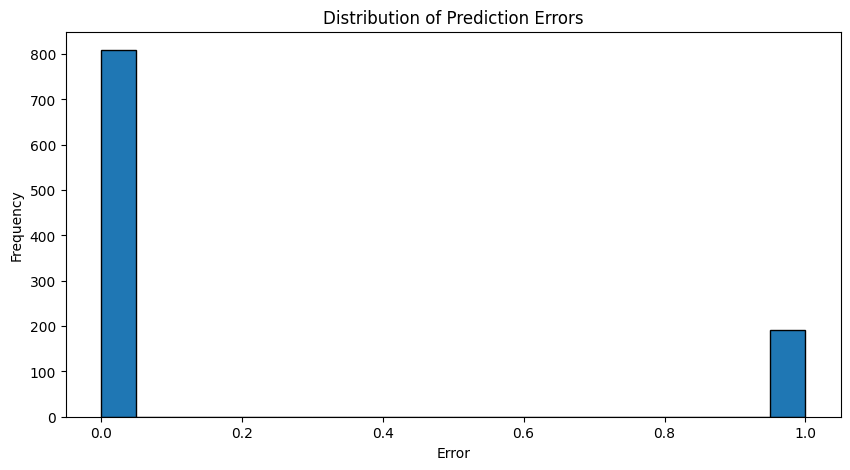

In [142]:


# 计算误差
errors = df.iloc[:, 34+label_index] - y_pred_binary[:, label_index]

# 绘制误差分布图
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=20, edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


计算 F1 score

In [143]:
# 计算宏平均F1分数
f1_scores = [f1_score(df.iloc[:, 34+i], y_pred_binary[:, i], average='macro') for i in range(y_pred_binary.shape[1])]
macro_average_f1 = np.mean(f1_scores)

print("F1 Scores:", macro_average_f1)


F1 Scores: 0.6880493411217166
